# Лабораторная работа №6

## Вариант 10 
## Деревья решений
### Данные:

Датасет – nba.csv

В качестве набора данных используется статистика новичков НБА для прогнозирования того, продержится ли игрок пять лет в лиге. Анализ полезен в работе над стратегиями команд и игроками.

Атрибуты:

• Name – имя игрока

• GP (Games Played) – общее количество игр, в которых игрок принимал участие

• MIN (Minutes) – общее количество минут, проведенных игроком на площадке

• PTS (Points) – общее количество очков, набранных игроком в течение карьеры
или в определенном сезоне

• FGM (Field Goals Made) – количество успешно заброшенных мячей

• FGA (Field Goals Attempted) – количество всех выполненных бросков

• FG% (Field Goal Percentage) – процент реализованных бросков в атаке

• 3Р Made – количество успешных трехочковых бросков


• 3РА (Three-Point Attempts) – количество попыток трехочковых бросков, пока-
зывающее, как часто игрок пытается забросить с дальней дистанции

• 3Р% (Three-Point Percentage) – процент реализации трехочковых бросков

• FTM (Free Throws Made) – количество успешно заброшенных штрафных брос-
ков

• FTA (Free Throws Attempted) – количество попыток штрафных бросков

• FT% (Free Throw Percentage) – процентное соотношение между результатив-
ными штрафными бросками и общим количеством штрафных

бросков
• OREB (Offensive Rebounds) – количество выигранных подборов под корзиной
соперника
• DREB (Defensive Rebounds) – количество выигранных подборов под своей
корзиной

• REB (Total Rebounds) – общее количество подборов (как атакующих, так и обо-
ронительных)

• AST (Assists) – количество передач, после которых был выполнен
результативный бросок
• STL (Steals) – количество удачных перехватов мяча
• BLK (Blocks) – количество удачно выполненных блоков
• TOV (Turnovers) – количество потерянных мячей
• Target_5Yrs – целевая переменная (0 или 1)


## Задание 1: Загрузить набор данных как датафрейм библиотеки pandas. Использовать набор данных для задания 3 (бинарная классификация).

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as pt
%matplotlib inline


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('nba.csv')

## Задание 2: Получить представлении о наборе данных с помощью методов shape, head, describe, info библиотеки pandas

In [3]:
df.shape

(1340, 21)

In [4]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [5]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

## Задание 3. Произвести предобработку данных: закодировать категориальные признаки в дискретные величины с помощью методов библиотеки sklearn; произвести нормализацию данных с помощью методов библиотеки sklearn.


In [7]:
print(df.isnull().sum())

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


In [8]:
df = df.dropna()
print(df.isnull().sum())

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64


## Задание 4: Произвести создание и обучение модели библиотеки sklearn, реализующей Random Forest (случайный лес).

Сначала разделим датасет на обучающую и тестовую выборки

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['TARGET_5Yrs', 'Name'], axis=1)
y = df['TARGET_5Yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (1063, 19)
Размер тестовой выборки: (266, 19)


Построим Базовое дерево решений:

In [10]:
base_dt = DecisionTreeClassifier(random_state=42)
base_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred_base = base_dt.predict(X_test)

In [12]:
accuracy_base = accuracy_score(y_test,y_pred_base)
print(f"Точность базового дерева на тесте: {accuracy_base:.4f}")

Точность базового дерева на тесте: 0.5865


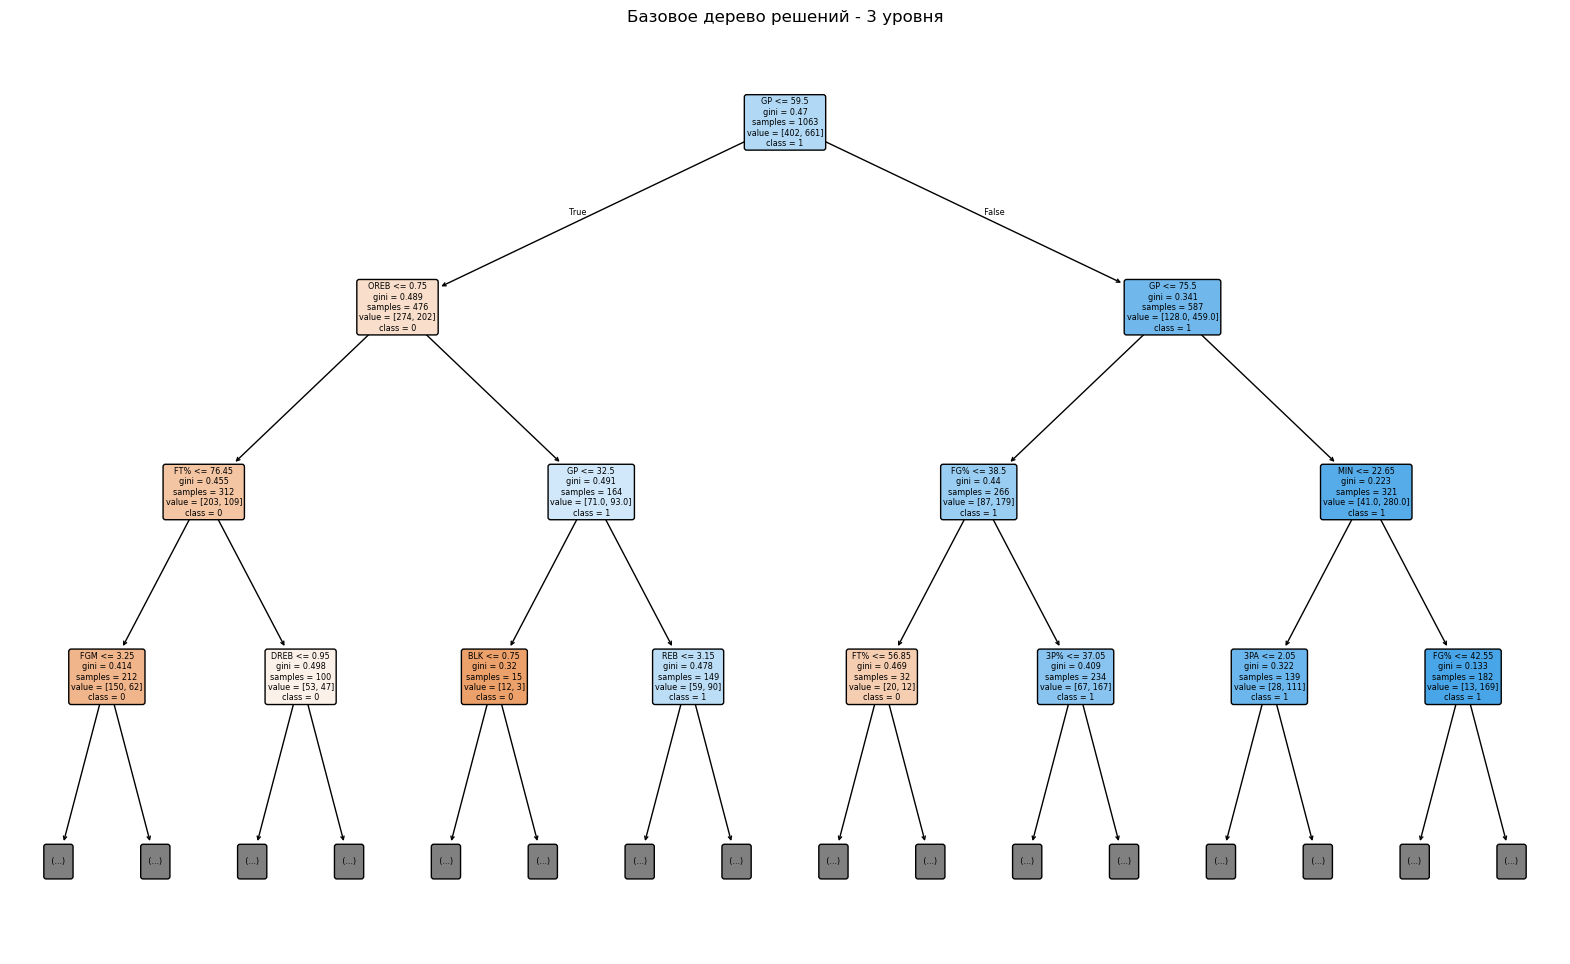

In [13]:
feature_names = X.columns.tolist()
class_names = ['0', '1']

pt.figure(figsize=(20,12))
plot_tree(base_dt, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, max_depth=3)
pt.title("Базовое дерево решений - 3 уровня")
pt.show()

## Задание 5: Подобрать гиперпараметры для улучшения модели.

In [14]:
tuned_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
tuned_dt.fit(X_train, y_train)

y_pred_tuned = tuned_dt.predict(X_test)
accuracy_tuned = accuracy_score(y_test,y_pred_tuned)
print(f"Точность настроенного дерева на тесте: {accuracy_tuned:.4f}")

Точность настроенного дерева на тесте: 0.6955


In [15]:
cv_scores_base = cross_val_score(base_dt, X, y, cv=5)
cv_scores_tuned = cross_val_score(tuned_dt, X, y, cv=5)

print(f"Кросс-валидация базового дерева: {np.mean(cv_scores_base):.4f} (+- {np.std(cv_scores_base) * 2:.4f})")
print(f"Кросс-валидация настроенного дерева: {np.mean(cv_scores_tuned):.4f} (+- {np.std(cv_scores_tuned) * 2:.4f})")


Кросс-валидация базового дерева: 0.5786 (+- 0.0933)
Кросс-валидация настроенного дерева: 0.6779 (+- 0.0440)


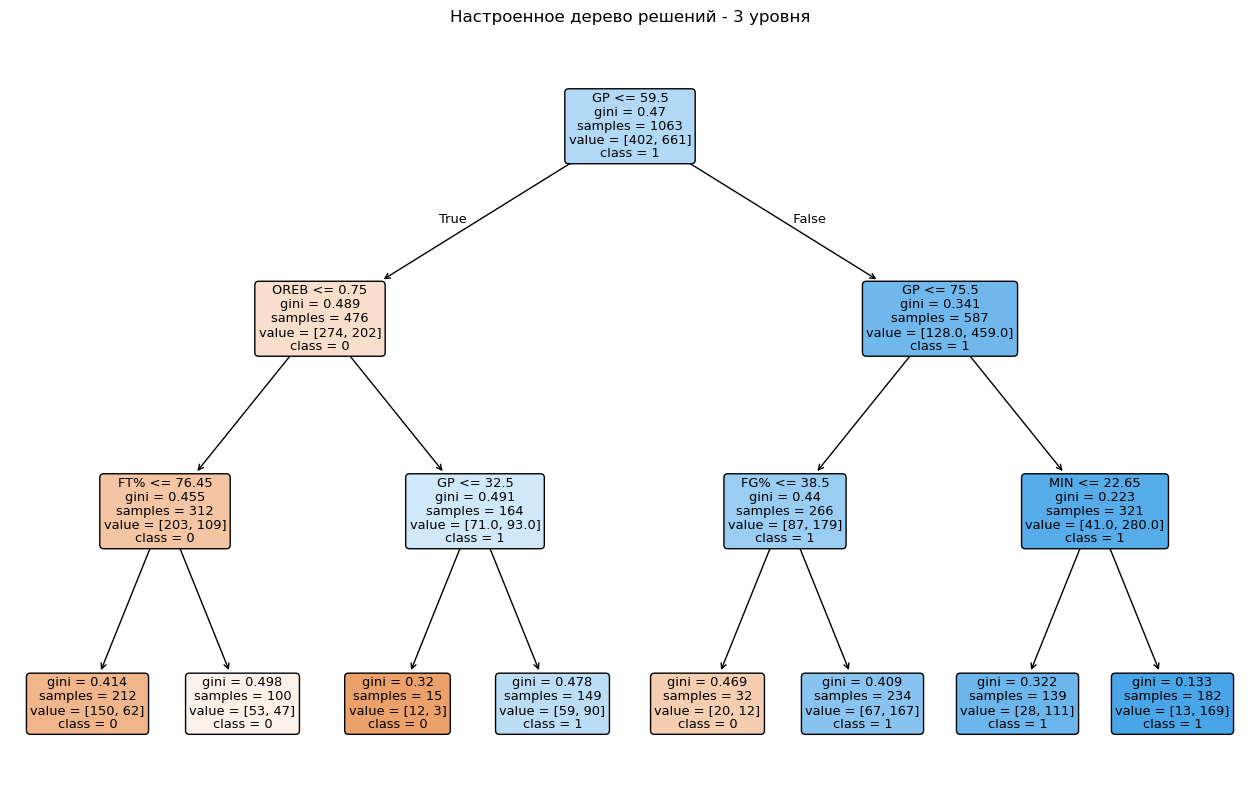

In [16]:
pt.figure(figsize=(16, 10))
plot_tree(tuned_dt, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
pt.title("Настроенное дерево решений - 3 уровня")
pt.show()

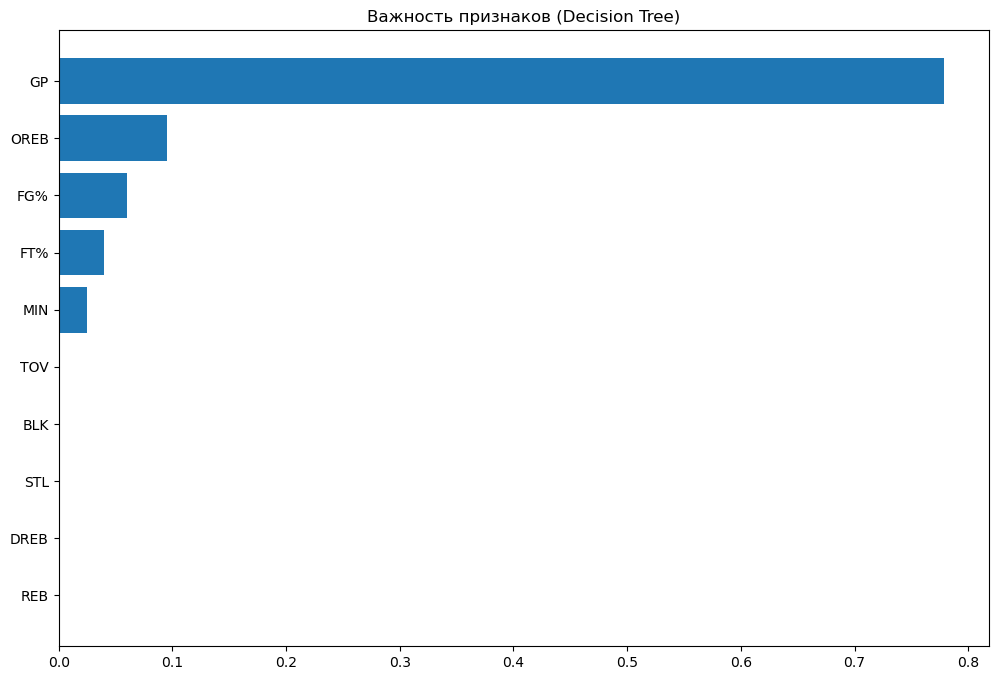

In [17]:
importances =tuned_dt.feature_importances_
indices = np.argsort(importances)[::-1]
pt.figure(figsize=(12, 8))
pt.title("Bажность признаков (Decision Tree)")
pt.barh(range(10), importances [indices][:10]) 
pt.yticks(range(10), [feature_names[i] for i in indices[:10]]) 
pt.gca().invert_yaxis()
pt.show()

Построим случайное дерево решений

In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Точность случайного леса на тесте: {accuracy_base:.4f}")

Точность случайного леса на тесте: 0.5865


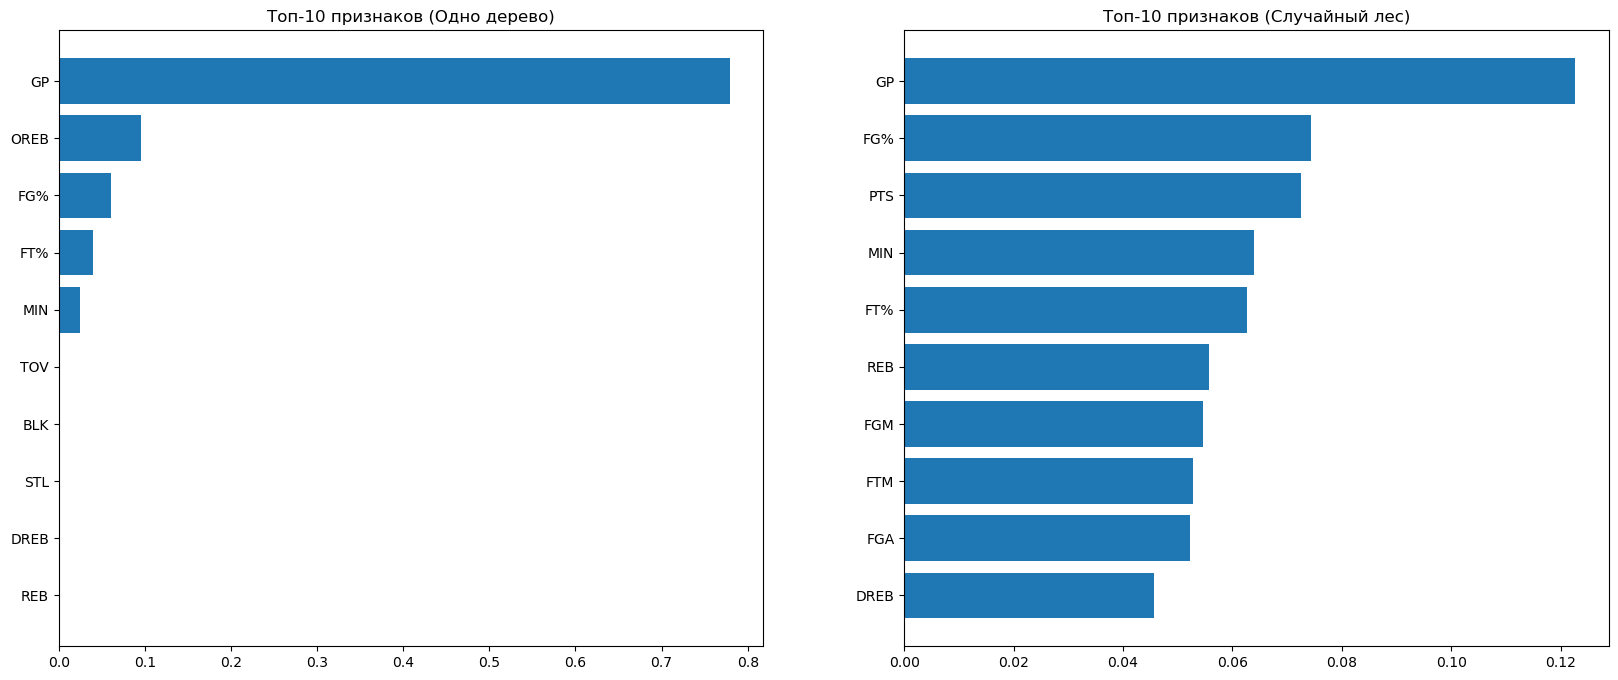

In [20]:
rf_importances = rf.feature_importances_
indices_rf = np.argsort(rf_importances)[::-1]

fig, (ax1, ax2) = pt.subplots(1, 2, figsize=(20, 8))

ax1.barh(range(10), importances[indices][:10])
ax1.set_title("Топ-10 признаков (Одно дерево)")
ax1.set_yticks(range(10))
ax1.set_yticklabels ([feature_names[i] for i in indices[:10]]) 
ax1.invert_yaxis()

ax2.barh(range(10), rf_importances[indices_rf][:10]) 
ax2.set_title("Топ-10 признаков (Случайный лес)")
ax2.set_yticks(range(10))
ax2.set_yticklabels ([feature_names[i] for i in indices_rf[:10]])
ax2.invert_yaxis()
pt.show()

## Задание 6: Оценить корректность построенной модели.

In [21]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Точность GradientBoosting на тесте: {accuracy_gb:.4f}")

Точность GradientBoosting на тесте: 0.6842


Теперь сравним все модели

In [22]:

models = {
'Base Decision Tree': base_dt,
'Tuned Decision Tree': tuned_dt,
 'Random Forest': rf,
 'Gradient Boosting': gb
}

results = {}
for name, model in models.items():
    if name not in ['Base Decision Tree', 'Tuned Decision Tree']:
        model.fit(X_train, y_train)
    train_acc = accuracy_score (y_train, model.predict(X_train))
    test_acc = accuracy_score (y_test, model.predict(X_test))
    results[name] = { 'Train Accuracy': train_acc, 'Test Accuracy': test_acc}

                     Train Accuracy  Test Accuracy
Base Decision Tree         0.987770       0.586466
Tuned Decision Tree        0.726246       0.695489
Random Forest              0.987770       0.687970
Gradient Boosting          0.868297       0.684211


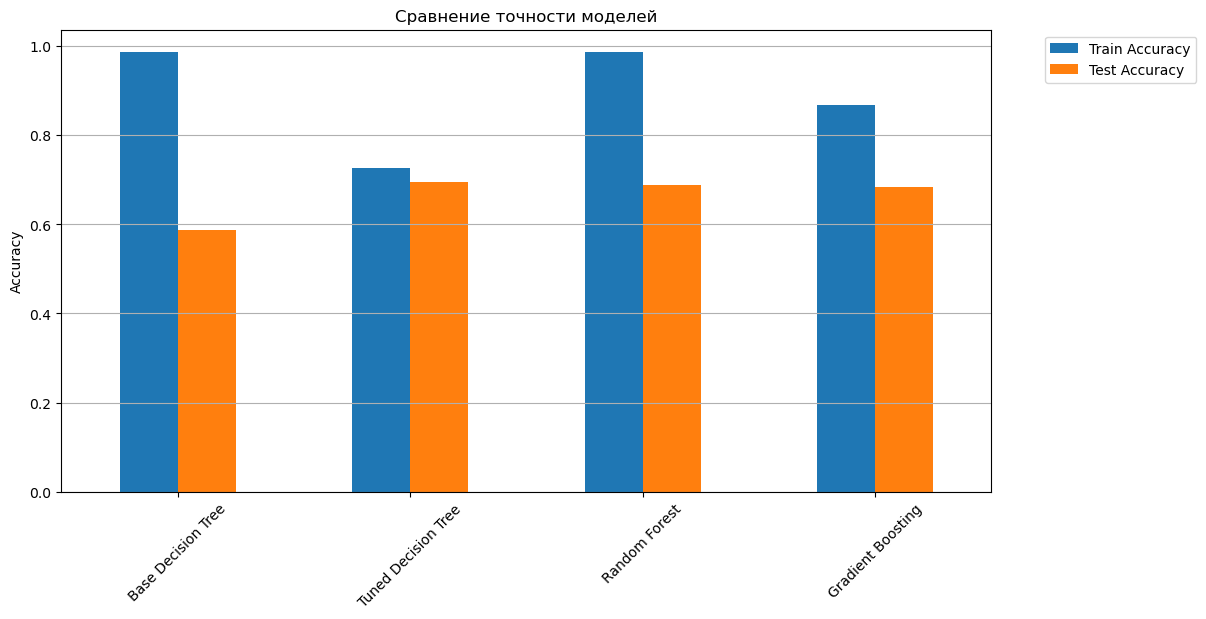

In [23]:
results_df = pd.DataFrame(results).T
print(results_df)

results_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(12, 6))
pt.title("Сравнение точности моделей")
pt.ylabel("Accuracy")
pt.xticks(rotation=45)
pt.legend (bbox_to_anchor= (1.05, 1), loc='upper left')
pt.grid(axis='y')
pt.show()

Вывод: везде точность не особо хорошая. Лучше всего результат у Tuned Decision Tree, хуже всего точность у Base Decision Tree.

## Вторая часть: случайный лес более детально с оптимизацией гиперпараметров

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = rf.predict(X_test)
accuracy= accuracy_score(y_test, y_pred_rf)
print(f"Точность случайного леса на тесте: {accuracy:.4f}")

Точность случайного леса на тесте: 0.6880


In [34]:
print("\n" + "="*50)
print("Отчет по классификации:")
print("="*50)

print(classification_report(y_test, y_pred, target_names=class_names))


Отчет по классификации:
              precision    recall  f1-score   support

           0       0.60      0.51      0.56       101
           1       0.73      0.79      0.76       165

    accuracy                           0.69       266
   macro avg       0.67      0.65      0.66       266
weighted avg       0.68      0.69      0.68       266



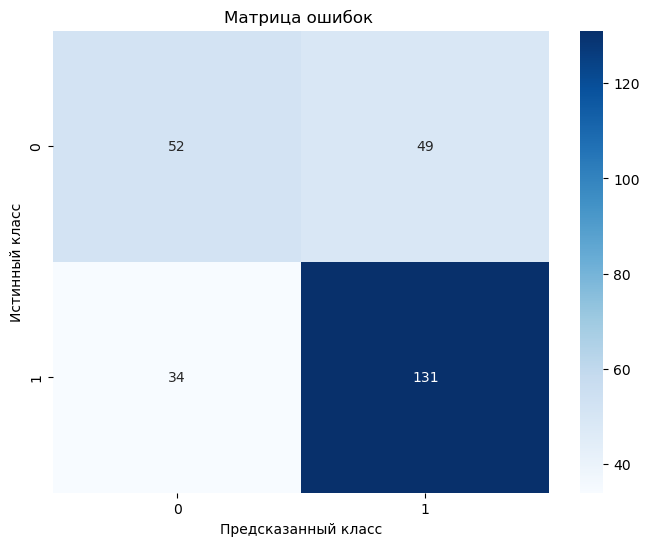

In [35]:
pt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
pt.title('Матрица ошибок ')
pt.xlabel('Предсказанный класс')
pt.ylabel('Истинный класс')
pt.show()

Анализ важности признаков

In [36]:
feature_importances = rf_model.feature_importances_
features_df = pd. DataFrame({'feature': X.columns, 'importance': feature_importances})
features_df = features_df.sort_values('importance', ascending=False)

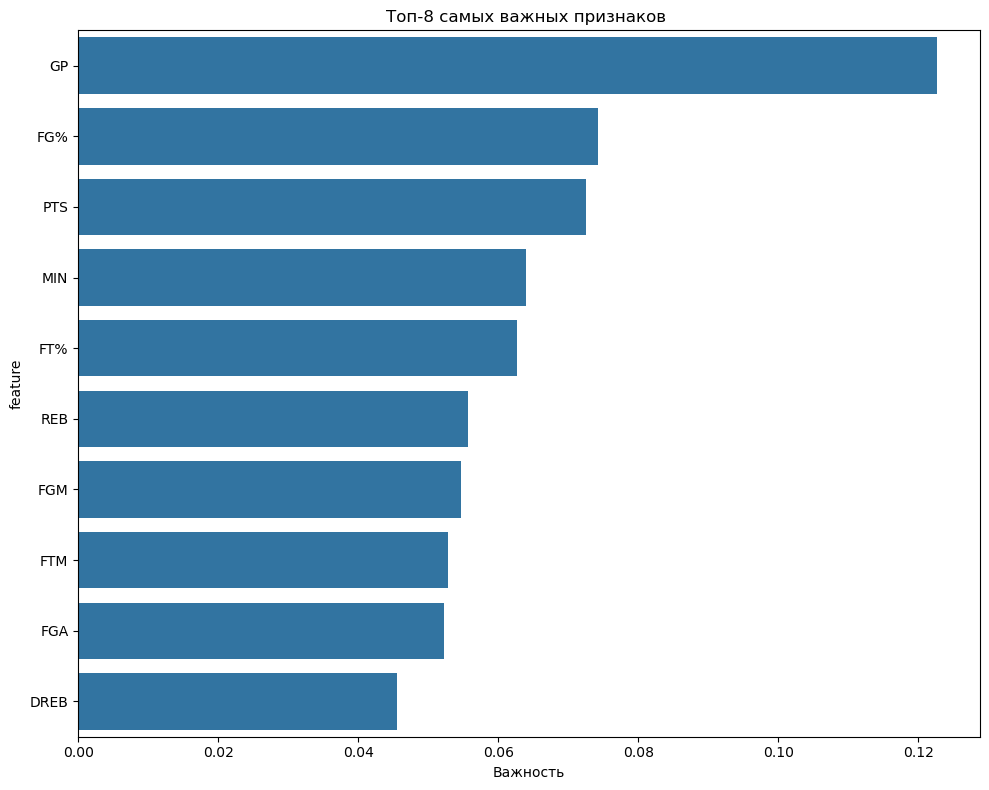

In [37]:
pt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=features_df.head(top_n))
pt.title('Tоп-8 самых важных признаков ')
pt.xlabel('Важность')
pt.tight_layout()
pt.show()

In [38]:
print("Топ-10 самых важных признаков")
print(features_df.head(10))

Топ-10 самых важных признаков
   feature  importance
0       GP    0.122674
5      FG%    0.074312
2      PTS    0.072527
1      MIN    0.064034
11     FT%    0.062665
14     REB    0.055691
3      FGM    0.054612
9      FTM    0.052772
4      FGA    0.052301
13    DREB    0.045592


Подбор гиперпараметров

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}

In [40]:

rf = RandomForestClassifier (random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [41]:

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность при кросс-валидации: {:.4f}".format(grid_search.best_score_))

Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Лучшая точность при кросс-валидации: 0.7046


In [42]:
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print (f"Точность улучшенной модели на тестовой выборке: {best_accuracy:.4f}")

Точность улучшенной модели на тестовой выборке: 0.7030


Вывод: гиперпараметрическая оптимизация привела к небольшому улучшению точности распознавания модели, что не может не радовать